INFO:postprocess_visual.imagenet:Using device: cuda


loss_dict = {}


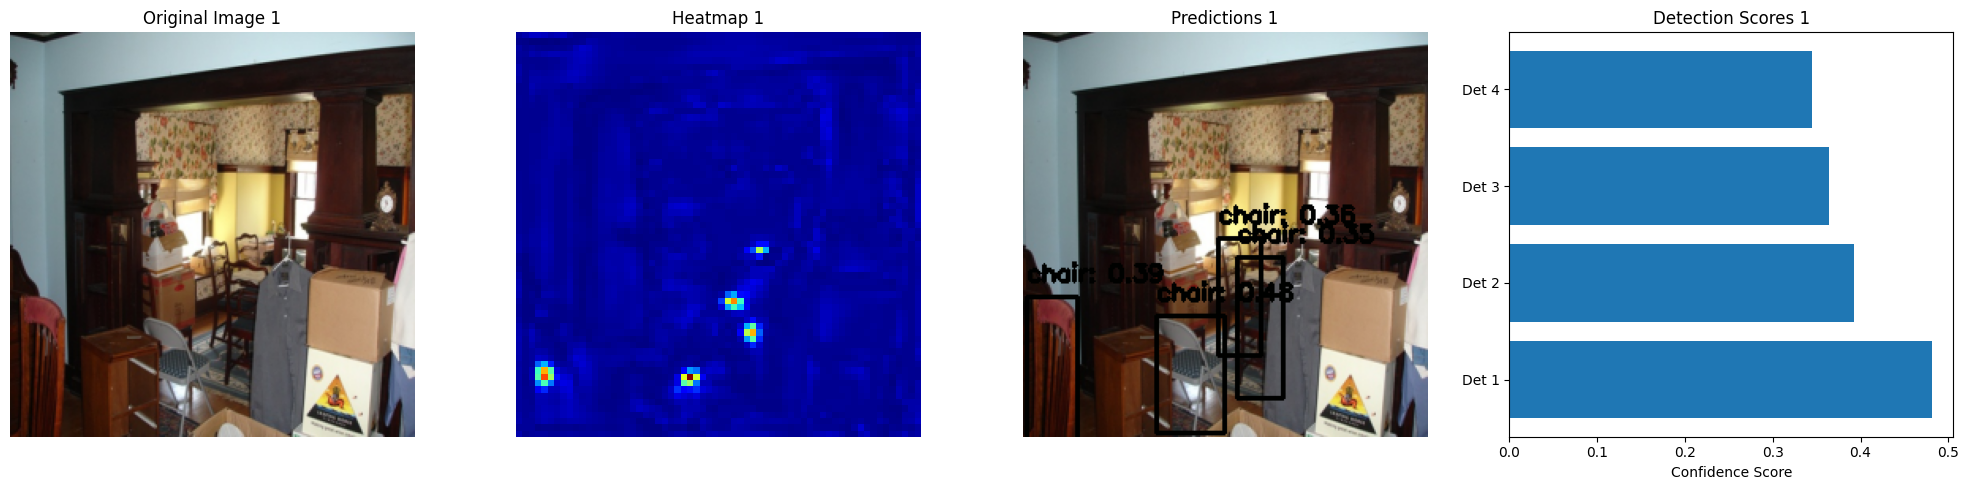

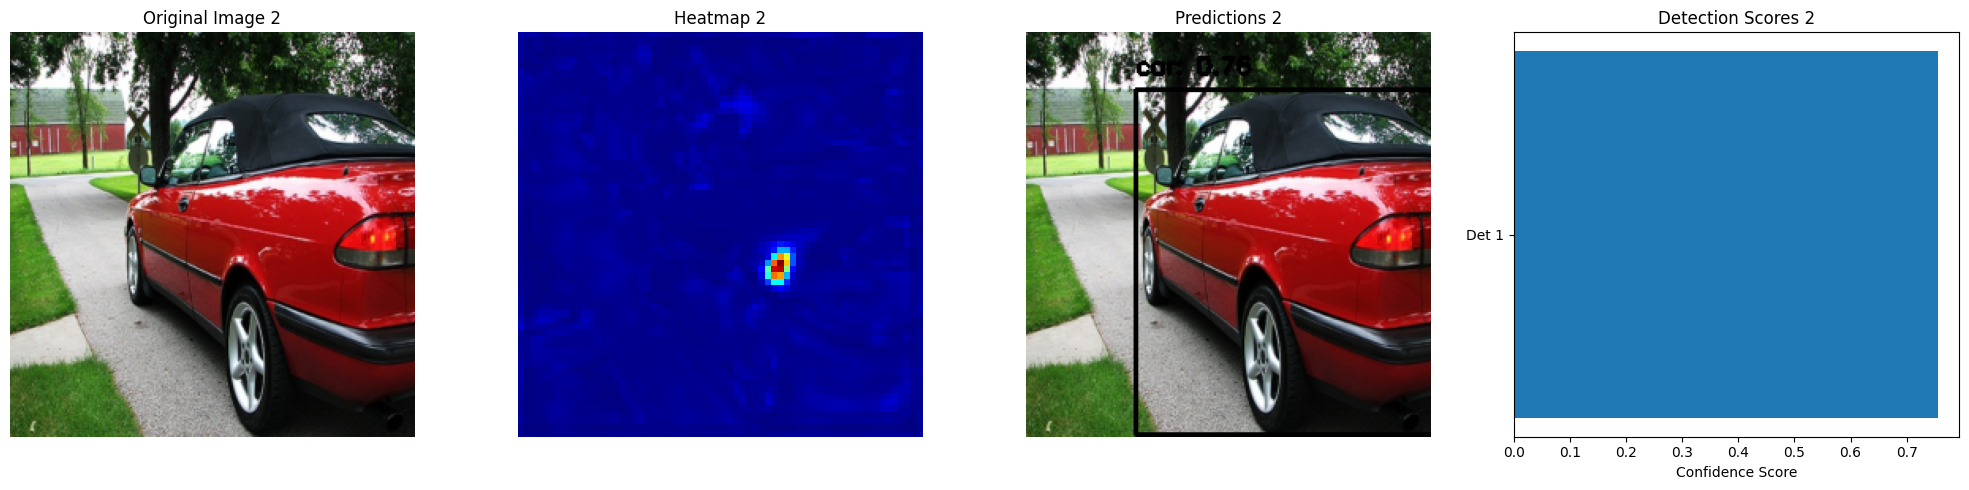

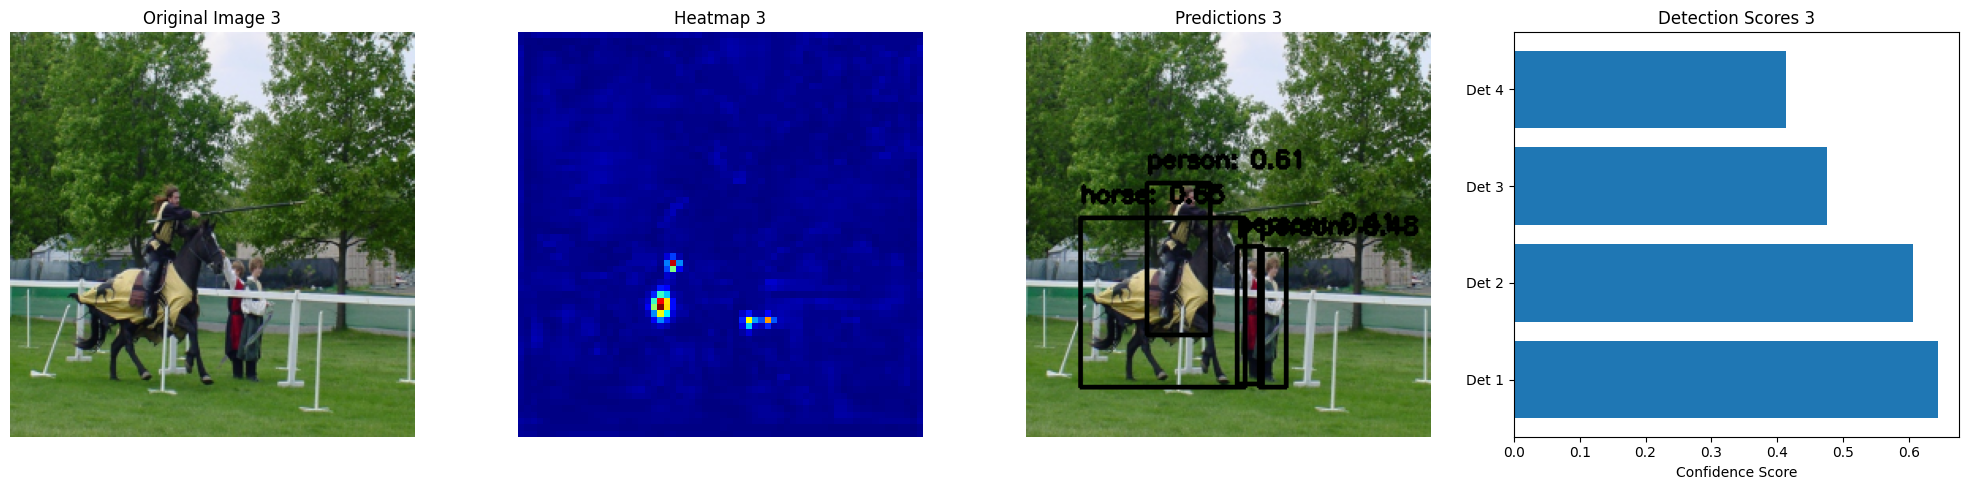

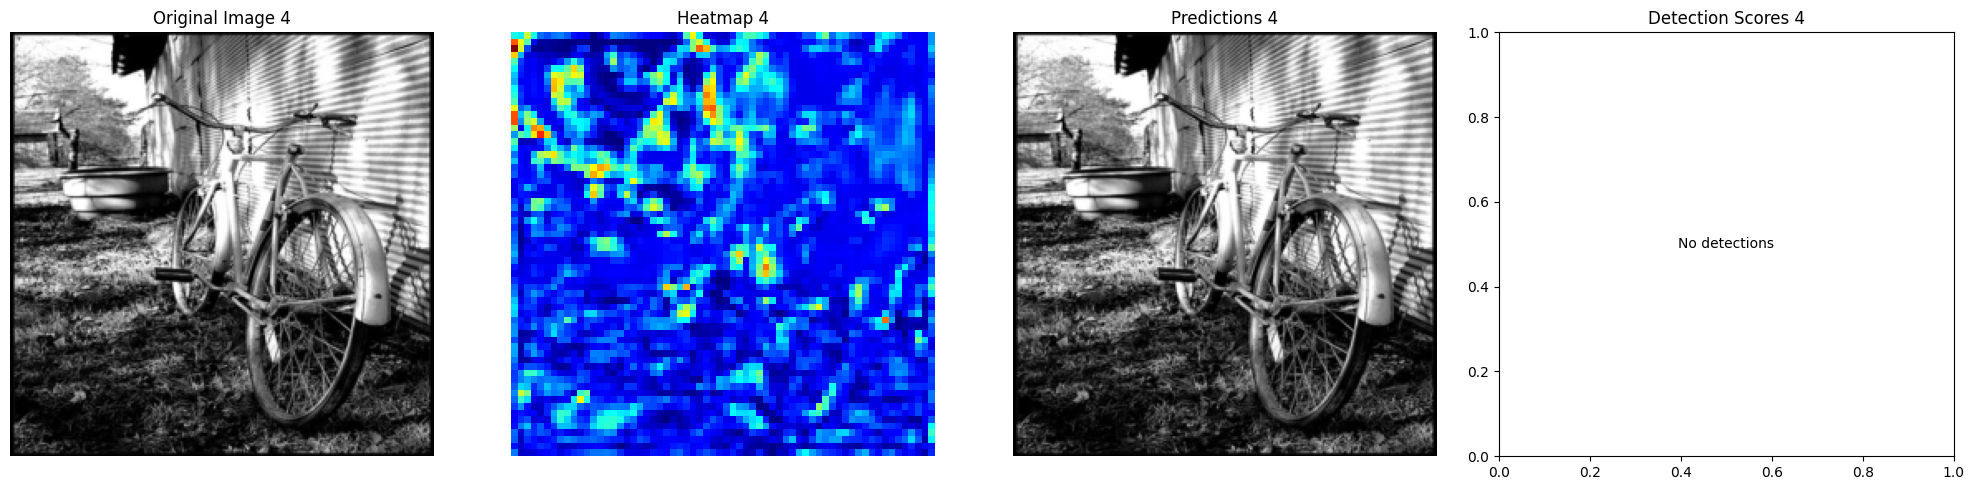

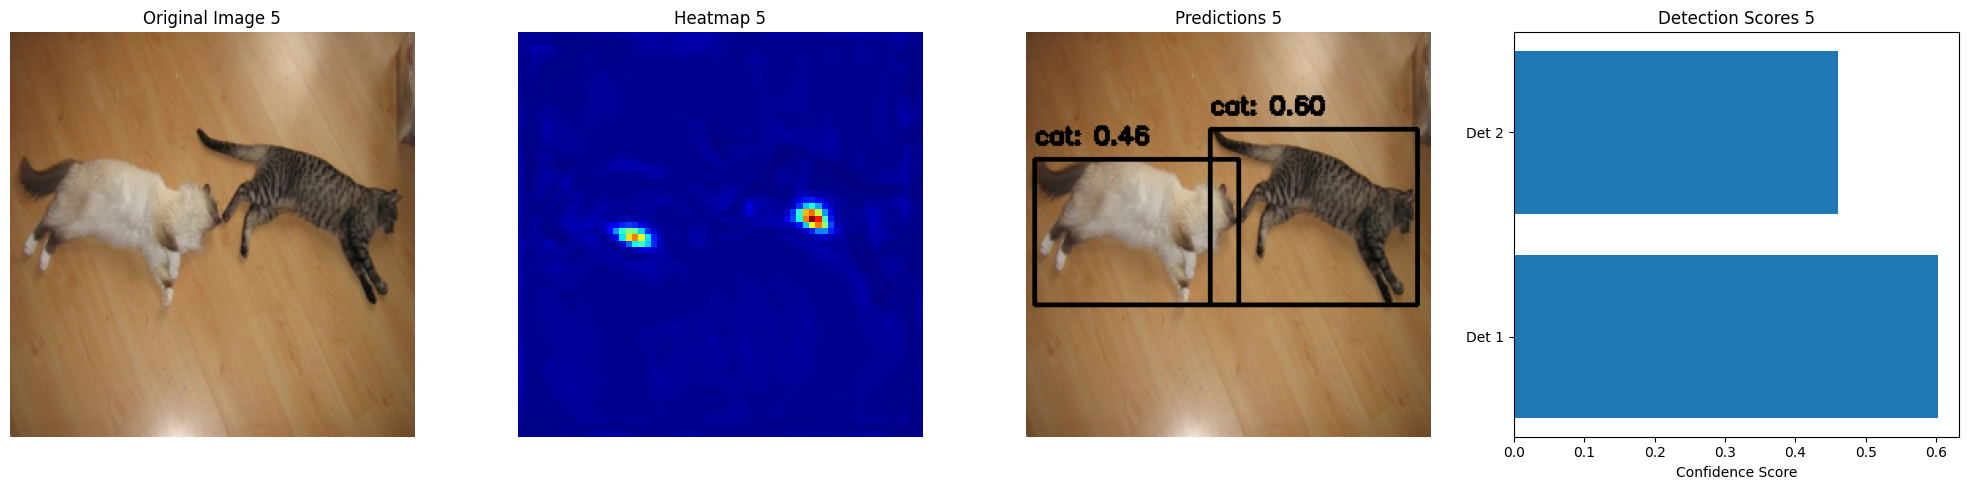

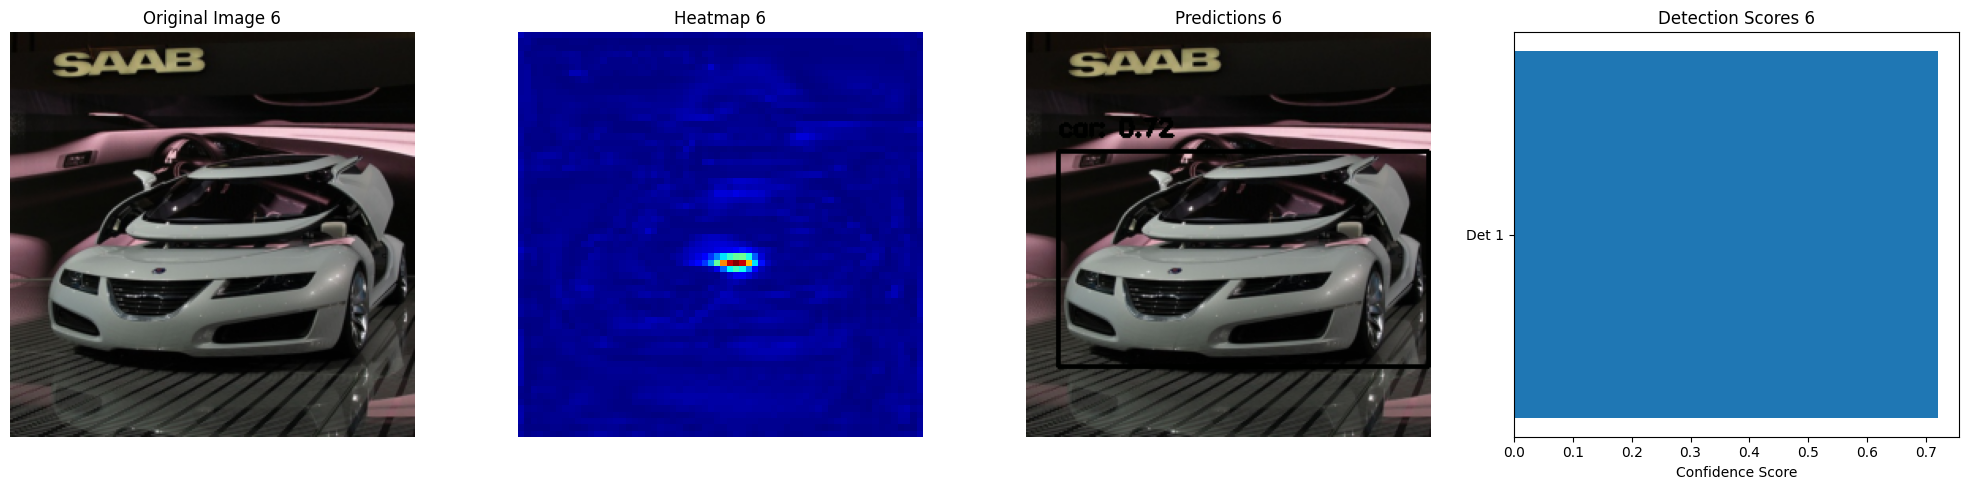

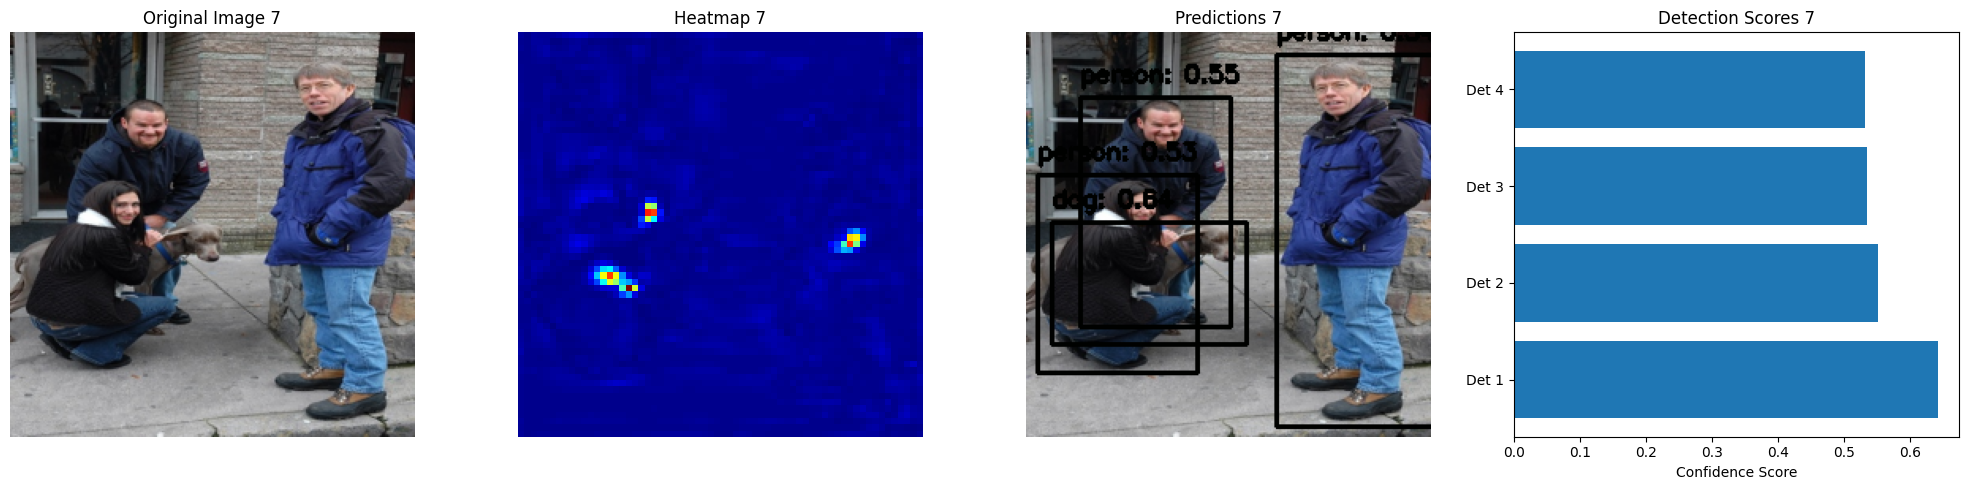

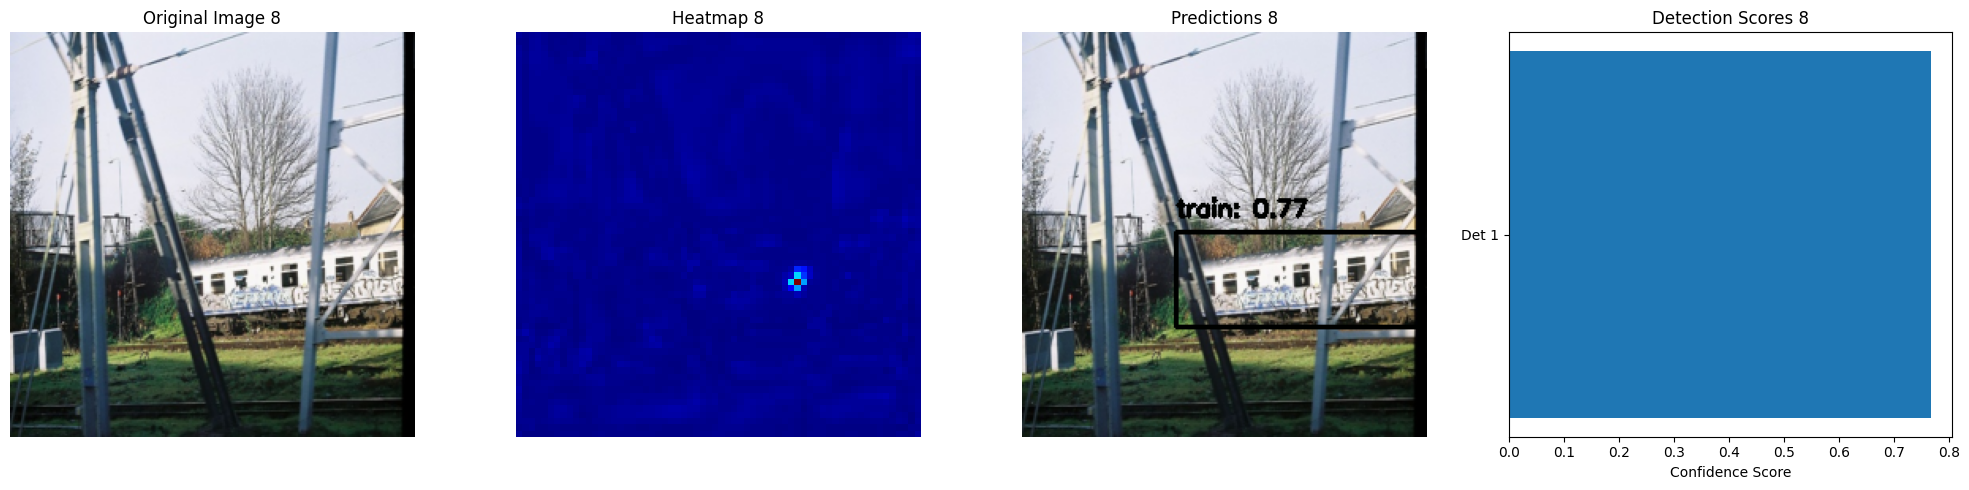

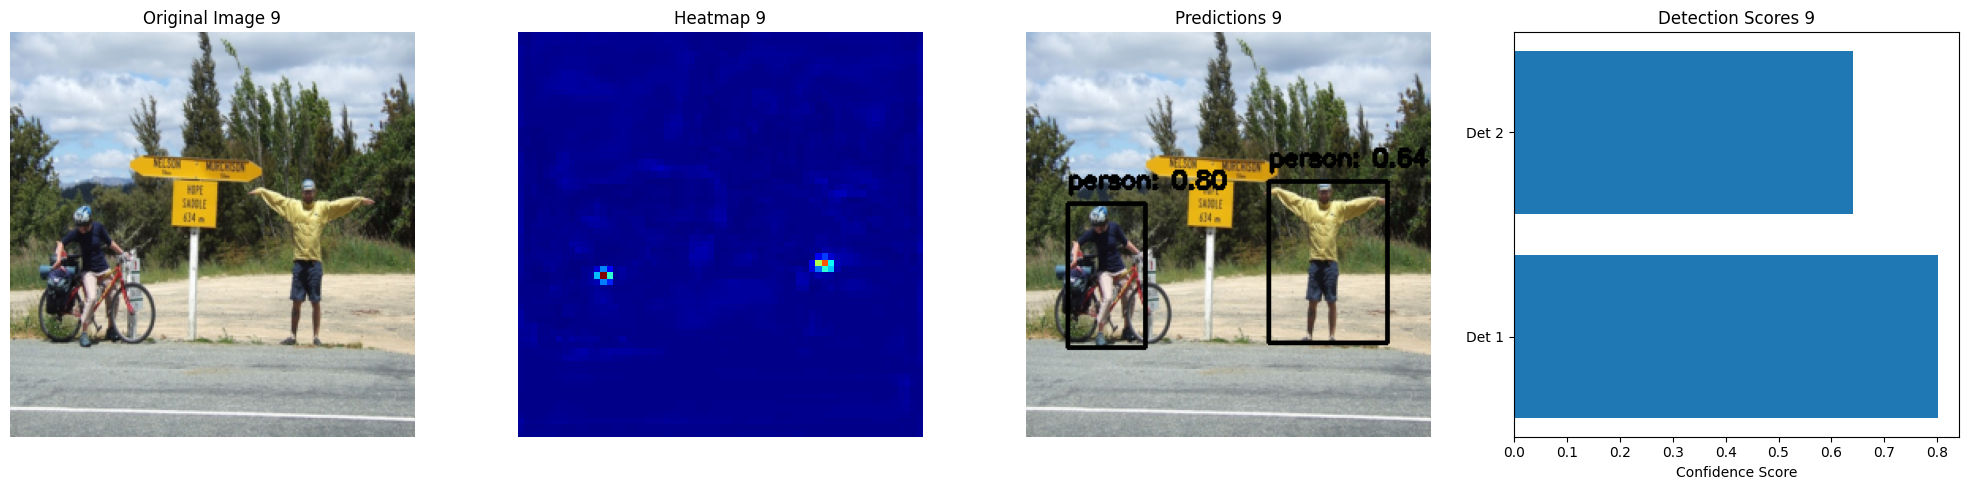

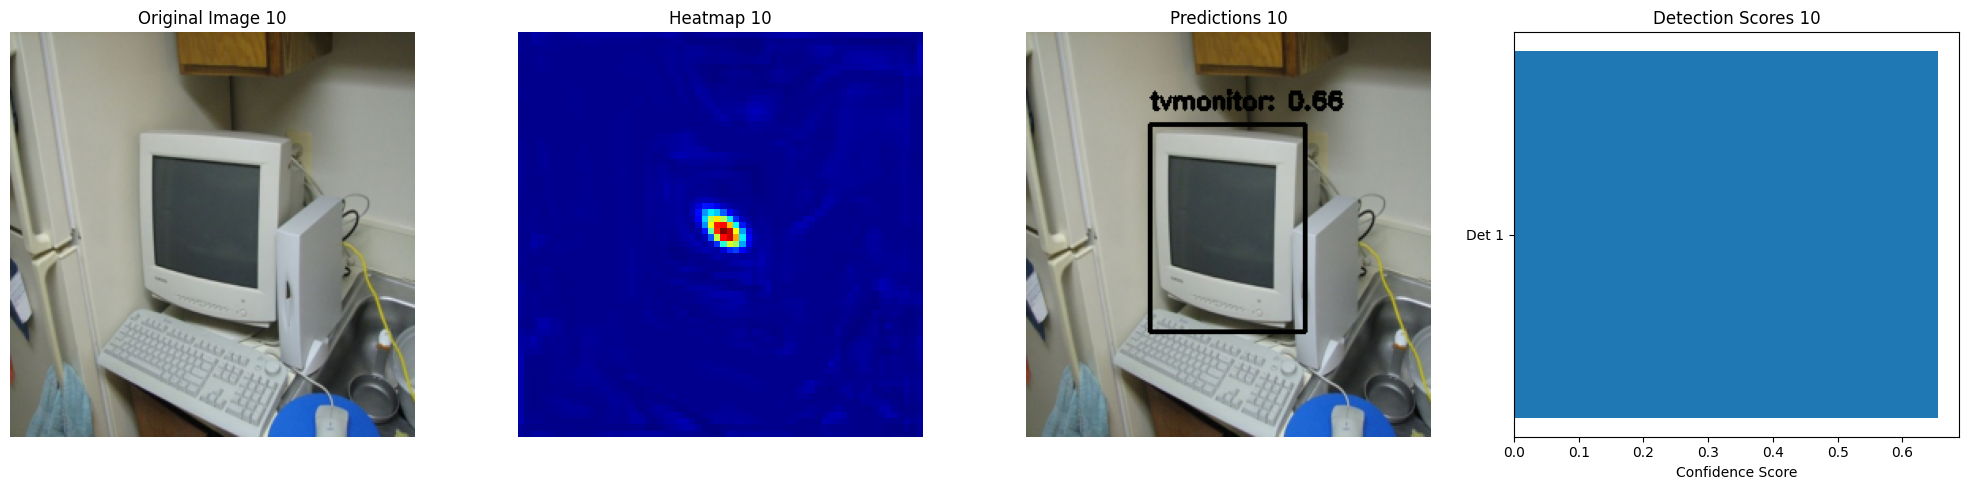

In [1]:
# visualizer_example.py

import torchvision
from torchvision.transforms import v2 as transforms
from torch.utils.data import Subset

from data.dataset_visualizer import ImageDatasetWithLabels
from postprocess_visual.object_detection_visualizer import ObjectDetectionVisualizer


def prepare_dataset():
    dataset = torchvision.datasets.VOCDetection(
        root="../VOC", year="2007", image_set="val", download=False
    )
    dataset = torchvision.datasets.wrap_dataset_for_transforms_v2(dataset)
    indices = range(10)
    dataset = Subset(dataset, indices)

    transform = transforms.Compose(
        [
            transforms.Resize(size=(256, 256)),
        ]
    )

    return ImageDatasetWithLabels(dataset=dataset, transformation=transform)


# Create visualizer with default settings
visualizer = ObjectDetectionVisualizer(
    dataset=prepare_dataset(),
    checkpoint_path="../models/checkpoints/imagenet_pretrained_weights.pt",
    input_height=256,
    input_width=256,
    confidence_threshold=0.3,
)

# Visualize predictions
visualizer.visualize_predictions()